In [2]:
import re
import os
import pathlib
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")

# Root of the project
project_dir = pathlib.Path().resolve().parent

# Directory containing experiment results
results_dir = (pathlib.Path(project_dir) / "results").resolve()

# Directory for tidied data (output directory)
data_dir = (pathlib.Path(project_dir) / "data").resolve()

# Directory to store all plots
plot_dir = (pathlib.Path(project_dir) / "plots").resolve()

In [3]:
# Load microbench 02 (target service results count results)
p = pathlib.Path(results_dir / "micro-bench/02_target")

files = [x for x  in p.iterdir()]

throughput_re = re.compile("Requests\/sec:\s+([0-9\.]+)\n")

requested_qps = []
actual_qps = []
for entry in files:
    fname = entry.name
    requested_qps.append(re.match("^wrk_(\d+k)\.out$", fname)[1])

    with open(entry) as f:
        data = f.read()
    
    matches = throughput_re.findall(data)
    actual_qps.append(float(matches[0]))

df = pd.DataFrame(data={
    "requested_qps": requested_qps,
    "actual_qps": actual_qps,
})

df.dtypes

df = df.sort_values(by="actual_qps", axis=0)
df.reindex()
df.head()

,requested_qps,actual_qps
4,20k,19469.58
3,25k,24943.21
2,30k,29934.17
0,35k,34849.89
1,40k,39895.22


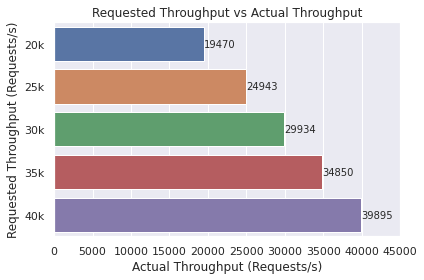

In [4]:
"""Chart shows the maximum throughput of our target services"""

fig, ax = plt.subplots()


ax = sns.barplot(data=df, x="actual_qps", y="requested_qps", ax=ax)

ax.set_xlim(0, 45000)

# # Show numbers on top of bars
ax.bar_label(ax.containers[0], label_type="edge", fmt="%.0f")

ax.set_xlabel("Actual Throughput (Requests/s)")
ax.set_ylabel("Requested Throughput (Requests/s)")
ax.set_title("Requested Throughput vs Actual Throughput")


fig.tight_layout()
fig.savefig(plot_dir / "microbench-target-service.pdf")


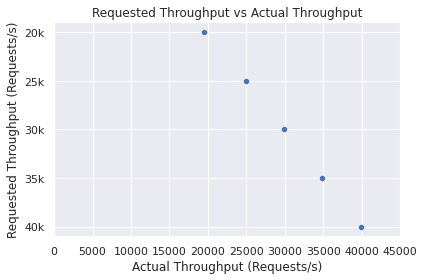

In [7]:
"""Chart shows the maximum throughput of our target services"""

fig, ax = plt.subplots()

ax = sns.scatterplot(data=df, x="actual_qps", y="requested_qps", ax=ax)

ax.set_xlim(0, 45000)

# # Show numbers on top of bars
# ax.bar_label(ax.containers[0], label_type="edge", fmt="%.0f")

ax.set_xlabel("Actual Throughput (Requests/s)")
ax.set_ylabel("Requested Throughput (Requests/s)")
ax.set_title("Requested Throughput vs Actual Throughput")


fig.tight_layout()


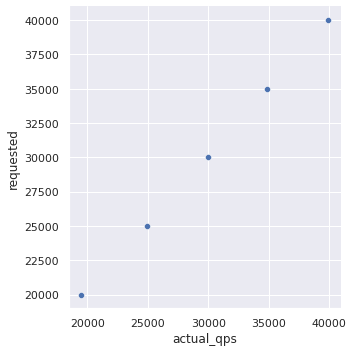

In [27]:
data=df
data["requested"] = data["requested_qps"].str.split("k").str.get(0)
data["requested"] = data["requested"].astype(int)
data["requested"] *= 1000

fig, ax = plt.subplots()
ax = sns.relplot(data=data, x="actual_qps", y="requested")